# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo01_enc.csv', index_col=0)
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False


In [3]:
df.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [4]:
y = df.mau
X = df.drop('mau', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
#1 e 2
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

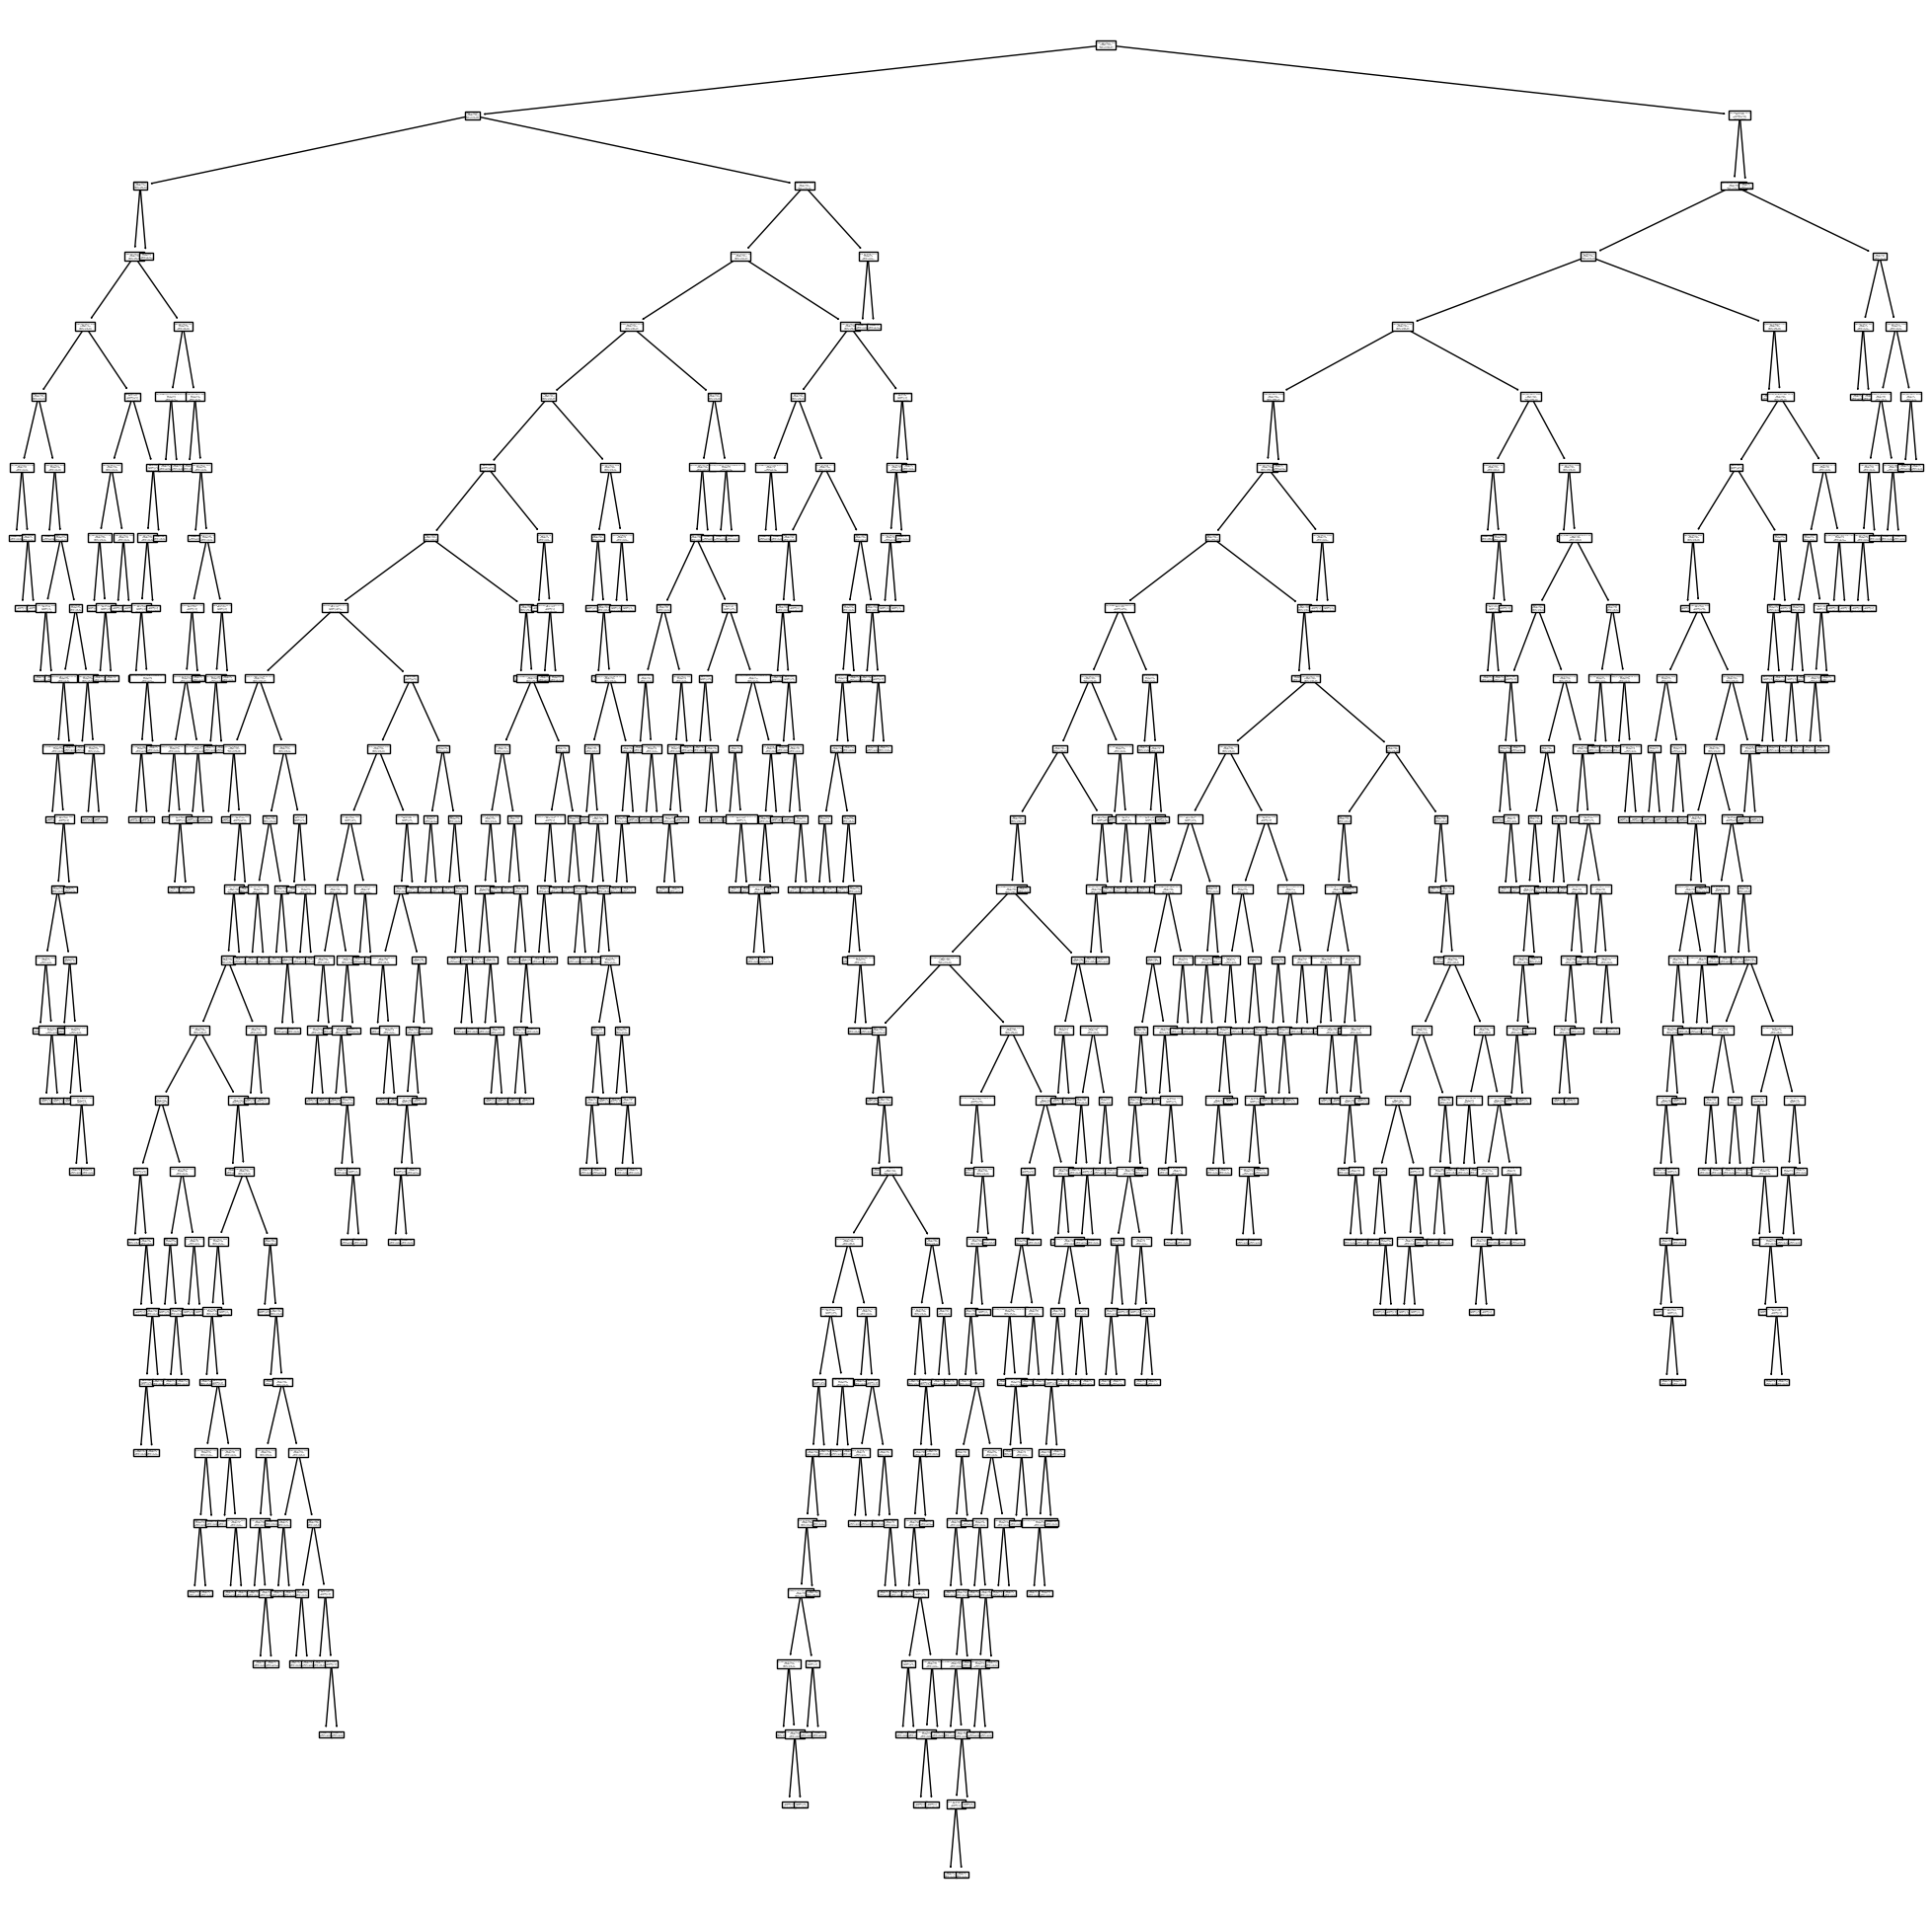

In [7]:
#3
plt.figure(figsize=(25,25))
plot_tree(clf, class_names=['aprovado', 'reprovado'], feature_names=X.columns)
plt.show()

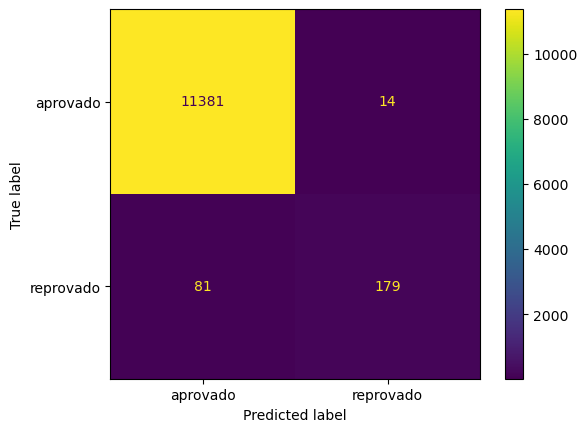

In [8]:
#4
y_train_pred = clf.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
cm_train_plot = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['aprovado', 'reprovado'])
cm_train_plot.plot()

In [9]:
#5
accuracy_score(y_train, y_train_pred)

0.9918489918489919

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

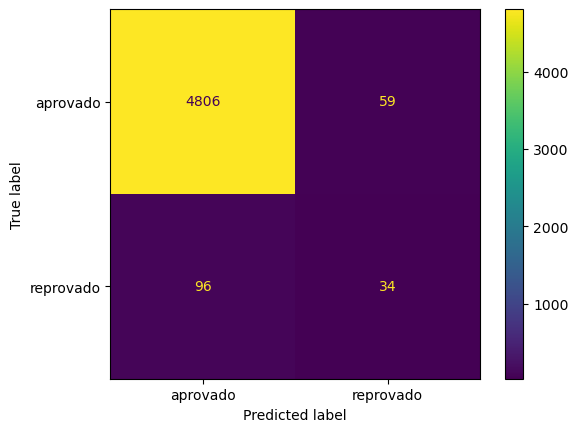

In [10]:
#1 e 2
y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
cm_test_plot = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['aprovado', 'reprovado'])
cm_test_plot.plot()

In [11]:
#3
accuracy_score(y_test, y_test_pred)

0.968968968968969

In [12]:
#acurácia menor mas ainda próxima dos dados de treino

In [13]:
#4
clf_lim = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

In [14]:
clf_lim.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=123)

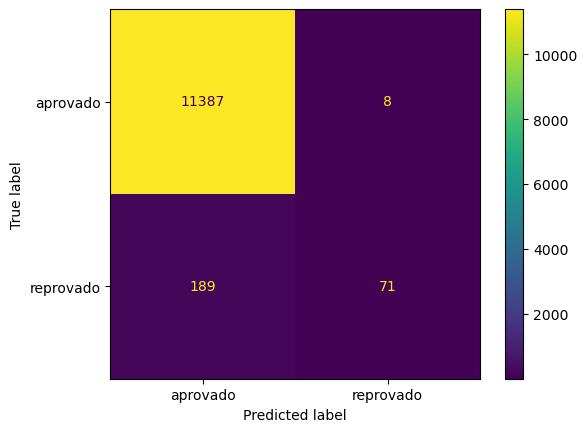

In [15]:
y_train_pred = clf_lim.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred, labels=clf_lim.classes_)
cm_train_plot = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['aprovado', 'reprovado'])
cm_train_plot.plot()

In [16]:
57/(57+203+11389+6)

0.004890604890604891

In [17]:
#0,4% dos propronentes seriam reprovados na análise

In [18]:
accuracy_score(y_train, y_train_pred)

0.9830973830973831

In [19]:
#5 não entendi muito bem essa questao, mas fiz assim
# testei o modelo nos dados de teste e troquei o vetor do predict para todos False, ou seja, todos aprovados
# e depois testei o accuracy com esse vetor
y_test_pred = clf_lim.predict(X_test)
y_test_pred

array([False, False, False, ..., False, False, False])

In [20]:
y_test_aprovados = y_test_pred.copy()

In [21]:
y_test_aprovados = [False for i in y_test_aprovados]

In [22]:
accuracy_score(y_test, y_test_aprovados)

0.973973973973974